Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4
Input Format
The first line contains two space separated integers, F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square-foot have been noted.
This is followed by a table having F+1 columns and N rows with each row in a new line and each column separated by a single space. The last column is the price per square foot.
The table is immediately followed by integer T followed by T rows containing F columns.
Constraints
1 <= F <= 5
5 <= N <= 100
1 <= T <= 100
0 <= Price Per Square Foot <= 10^6 0 <= Factor Values <= 1



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("data_final.xlsx") #loading the dataset

In [3]:
df.head()   #reading the dataset

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [4]:
df.shape   #finding number of columns and rows

(100, 3)

In [5]:
# rows=100
#column=3


In [6]:
df.info() # describing the columns of the dataset and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
df.describe() # finding max,min and other values of all column

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [8]:
df.isnull().sum()  # checking the null values

observation    0
feature        0
price          0
dtype: int64

In [9]:
#  NO  null values present

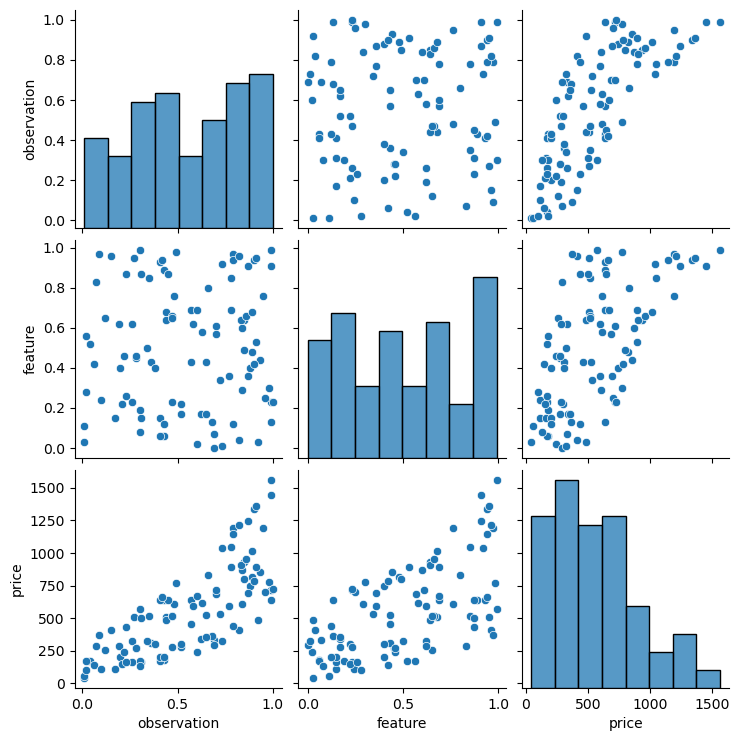

In [10]:
sns.pairplot(df)

In [11]:
# we can conclude that price is a dependent variable and feature and observation are independent

In [12]:
# seperating depending and independent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


# train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

Model

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
poly = poly_reg.fit_transform(X_train)
lg = LinearRegression()
lg.fit(poly,y_train)

LinearRegression()

In [16]:
ypred=lg.predict(poly_reg.fit_transform(X_test))

In [17]:
ypred

array([ 505.75829111,  719.91661369,  204.07900267,  963.06064178,
        160.87492855,  593.42154391, 1152.15269587,  246.1195956 ,
        609.01464213,  290.02408623,  903.2393656 ,  359.3060724 ,
        437.94853189,  901.85413583,  643.8048081 ,  293.00525748,
       1025.4298565 ,  460.02685697,  177.44358543,  530.72486168])

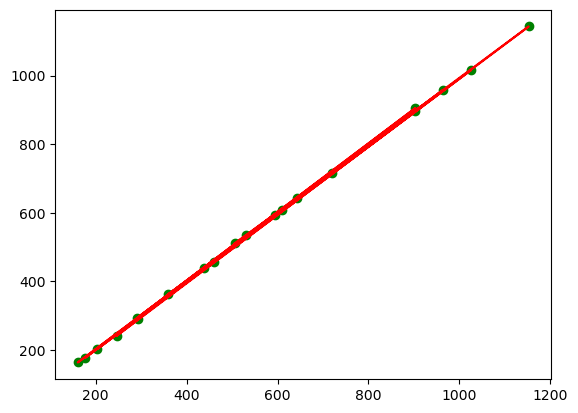

In [26]:
plt.scatter(ypred,y_test,color='green')
plt.plot(ypred,y_test,color='red')

In [23]:
#we can see that all the point are on the regression line , so our model is working good
#Hence we have created a model which can predict price very accurately as we can see from the above plot 